In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import optimize

In [2]:
#données du problème :

n=100 #discretisation

#temps:
t0=0
tf=299
lt=np.linspace(t0,tf,n+1)

#charge
Qm=10
c0=0.2
cf=1

#prix
ph=1
pb=0.5

#Intensité
Im=2

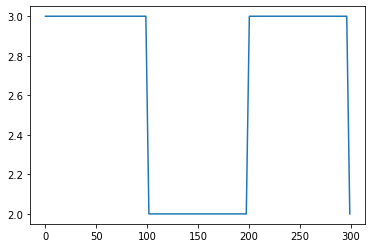

In [3]:
def PrixHoraire(t,ph,pb):
    n=np.floor(t)
    if n%200 < 99:
        return ph
    else:
        return pb
    
VPrixHoraire= np.vectorize(PrixHoraire)
lprix=VPrixHoraire(lt,3,2)
plt.plot(lt,lprix)
plt.show()

In [4]:
def charge(I): #donne la charge à tout temps(charge absolue, pas en %)
    c=c0*Qm
    charge=np.zeros(n)
    for i in range (n):
        Q=-(lt[i+1]-lt[i])*(I[i])
        c+=Q
        charge[i]=c
    return charge

In [5]:
def fcout1(I): 
    S=0
    listeS=[]
    for i in range (n):
        Q=-(lt[i+1]-lt[i])*I[i]
        P=PrixHoraire(lt[i],ph,pb) #On suppose ici que l'on ne change pas de prix horaire sur l'intervalle listet[i], listet[i+1]
        S+=P*Q
        listeS.append(S)
    return S,np.array(listeS)

In [7]:
def affichage(I):    
    lcout=fcout1(I)[1]
    lcharge=charge(I)
    lprix=VPrixHoraire(lt[0:n],3,2)
    plt.plot(lt[0:n],lcout,'+',label="cout")
    plt.plot(lt[0:n],lcharge,'+',label="charge")
    plt.plot(lt[0:n],lprix,'+',label="prix")
    plt.plot(lt[0:n],I,'+',label="intensité")
    plt.legend()
    plt.plot()


In [9]:
F=np.array([(lt[i+1]-lt[i])*PrixHoraire(lt[i],ph,pb) for i in range (n)])

Aun=np.zeros ((2*n,n)) 
#Contraintes inégalités ( limitation de la borne)
for i in range (n):
    Aun[i,i]=-1
    Aun[n+i,i]=1
    
    
Bun=np.zeros(2*n)
for i in range(n):
    Bun[i]=Im
for i in range(n,2*n):
    Bun[i]=0
# Contrainte égalité (chargement)


Aeq=np.zeros ((1,n))
Aeq[0,:]=np.array([lt[i+1]-lt[i] for i in range (n)])
    
Beq=np.zeros(1)
Beq[0]=-(cf-c0)*Qm

In [10]:
X=optimize.linprog(F,A_ub=None,b_ub=None,A_eq=Aeq,b_eq=Beq,bounds=(-Im,0))

In [13]:
I=X["x"]

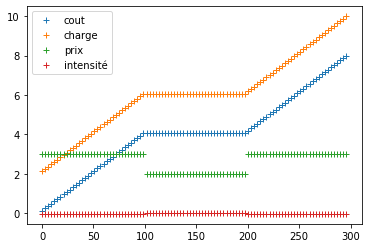

In [14]:
affichage(I)